In [13]:
#Step 1. Import the necessary libraries

import pandas as pd 
import numpy as np 


In [14]:
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called baby_names.

url ='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv'
baby_names = pd.read_csv(url)

baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [15]:
#Step 4. See the first 10 entries

baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


In [16]:
#Step 5. Delete the column 'Unnamed: 0' and 'Id'


# Drop the columns 'Unnamed: 0' and 'Id'
baby_names.drop(['Unnamed: 0', 'Id'], axis=1, inplace=True)

# Display the first few rows of the DataFrame after dropping the columns
print(baby_names.head())

      Name  Year Gender State  Count
0     Emma  2004      F    AK     62
1  Madison  2004      F    AK     48
2   Hannah  2004      F    AK     46
3    Grace  2004      F    AK     44
4    Emily  2004      F    AK     41


In [17]:
#Step 6. Is there more male or female names in the dataset?

# Count the occurrences of each gender
gender_counts = baby_names['Gender'].value_counts()

# Display the gender counts
print(gender_counts)

F    558846
M    457549
Name: Gender, dtype: int64


In [18]:
#Step 7. Group the dataset by name and assign to names

# Group the dataset by name and store the grouped object in 'names'
names = baby_names.groupby('Name').count()

# Display the first few rows of the grouped object 'names'
print(names.head())

         Year  Gender  State  Count
Name                               
Aaban       2       2      2      2
Aadan       4       4      4      4
Aadarsh     1       1      1      1
Aaden     196     196    196    196
Aadhav      1       1      1      1


In [21]:
#Step 8. How many different names exist in the dataset?

# Count the number of different names in the dataset
num_different_names = baby_names['Name'].nunique()

# Display the result
print("Number of different names:", num_different_names)

Number of different names: 17632


In [22]:
#Step 9. What is the name with most occurrences?

# Count the occurrences of each name and find the most common name
most_common_name = baby_names['Name'].value_counts().idxmax()

# Display the result
print("The name with the most occurrences is:", most_common_name)


The name with the most occurrences is: Riley


In [24]:
#Step 10. How many different names have the least occurrences?

names_least_common = baby_names['Name'].value_counts().idxmin()

print("names with the least occurence is:", names_least_common)

names with the least occurence is: Grettell


In [31]:
#Step 11. What is the median name occurrence?



# Separate DataFrames for boys and girls
boys_names = baby_names[baby_names['Gender'] == 'M']
girls_names = baby_names[baby_names['Gender'] == 'F']

# Count the occurrences of each name for boys and girls
boys_name_counts = boys_names['Name'].value_counts()
girls_name_counts = girls_names['Name'].value_counts()

# Calculate the median of the name occurrences for boys and girls
median_boys_name_occurrence = boys_name_counts.median()
median_girls_name_occurrence = girls_name_counts.median()

# Filter names that occur at the median frequency for boys and girls
median_boys_names = boys_name_counts[boys_name_counts == median_boys_name_occurrence].index.tolist()
median_girls_names = girls_name_counts[girls_name_counts == median_girls_name_occurrence].index.tolist()

# Create DataFrames for the median names for boys and girls
median_boys_df = pd.DataFrame({'Boys Median Names': median_boys_names})
median_girls_df = pd.DataFrame({'Girls Median Names': median_girls_names})

# Drop any duplicate names
median_boys_df.drop_duplicates(inplace=True)
median_girls_df.drop_duplicates(inplace=True)

# Display the result
print("Median Names for Boys:")
print(median_boys_df.head())

print("\nMedian Names for Girls:")
print(median_girls_df.head())



Median Names for Boys:
  Boys Median Names
0              Koji
1             Riaan
2           Maximos
3            Maciej
4           Sanchez

Median Names for Girls:
  Girls Median Names
0              Solei
1          Charmaine
2               Vita
3           Braleigh
4        Mariaisabel


In [37]:
#Step 12. What is the standard deviation of names?



# Separate DataFrames for boys and girls
boys_names = baby_names[baby_names['Gender'] == 'M'].copy()
girls_names = baby_names[baby_names['Gender'] == 'F'].copy()

# Count the occurrences of each name for boys and girls
boys_name_counts = boys_names['Name'].value_counts()
girls_name_counts = girls_names['Name'].value_counts()

# Calculate the standard deviation of the name occurrences for boys and girls
boys_names_std = boys_name_counts.std()
girls_names_std = girls_name_counts.std()

# Create DataFrames for standard deviation of names for boys and girls
boys_names_std_df = pd.DataFrame({'Boys Names': [boys_names_std]})
girls_names_std_df = pd.DataFrame({'Girls Names': [girls_names_std]})

# Drop any duplicate names
boys_names.drop_duplicates(subset='Name', inplace=True)
girls_names.drop_duplicates(subset='Name', inplace=True)

# Add names to the DataFrames
boys_names_df = pd.DataFrame({'Boys Names': boys_names['Name']})
girls_names_df = pd.DataFrame({'Girls Names': girls_names['Name']})

# Display the result
print("Standard Deviation of Name Occurrences for Boys:")
print(pd.concat([boys_names_std_df, boys_names_df], axis=1))

print("\nStandard Deviation of Name Occurrences for Girls:")
print(pd.concat([girls_names_std_df, girls_names_df], axis=1))


Standard Deviation of Name Occurrences for Boys:
         Boys Names Boys Names
0        117.632759        NaN
2404            NaN      Ethan
2405            NaN     Joseph
2406            NaN      James
2407            NaN      Jacob
...             ...        ...
997507          NaN       Kong
999866          NaN     Adrion
1000541         NaN      Braun
1000722         NaN     Evrett
1012216         NaN    Coalton

[8013 rows x 2 columns]

Standard Deviation of Name Occurrences for Girls:
       Girls Names Girls Names
0       106.735392        Emma
1              NaN     Madison
2              NaN      Hannah
3              NaN       Grace
4              NaN       Emily
...            ...         ...
974367         NaN     Imogene
986337         NaN    Montanna
988094         NaN       Anaka
991043         NaN     Shouana
993126         NaN      Luanna

[10929 rows x 2 columns]


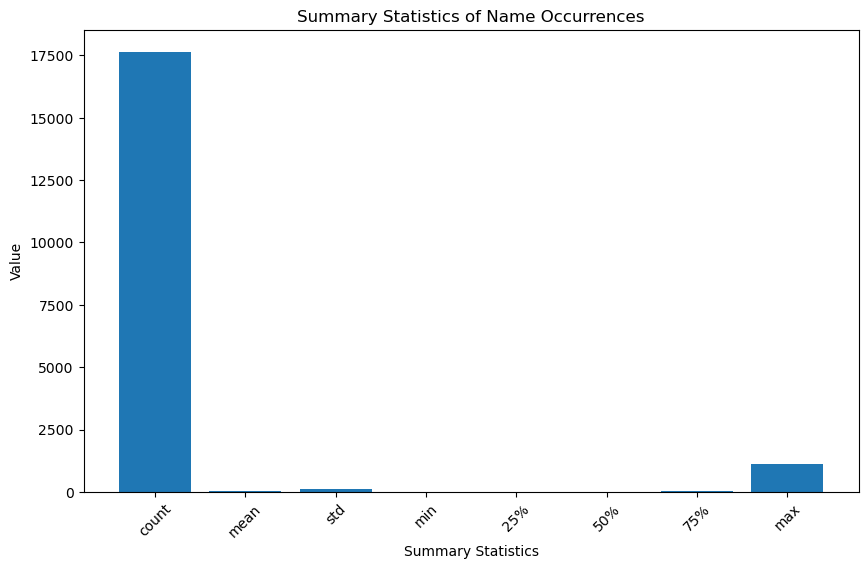

In [42]:
#Step 13. Get a summary with the mean, min, max, std and quartiles.

import pandas as pd
import matplotlib.pyplot as plt


# Count the occurrences of each name
name_counts = baby_names['Name'].value_counts()

# Get a summary with the mean, min, max, std, and quartiles
name_summary = name_counts.describe()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(name_summary.index, name_summary.values)
plt.xlabel('Summary Statistics')
plt.ylabel('Value')
plt.title('Summary Statistics of Name Occurrences')
plt.xticks(rotation=45)
plt.show()
